### YOLO V8 for Medical Instant Segmentation of Tissues (Annotation: blood_vessel, glomerulus or unsure)
Data source from kaggle


In [1]:
!nvidia-smi

Sun Dec 24 21:38:06 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.99                 Driver Version: 537.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Quadro RTX 4000              WDDM  | 00000000:9E:00.0  On |                  N/A |
| 72%   83C    P8              31W / 125W |   1475MiB /  8192MiB |     22%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
print(os.environ.get('CUDA_PATH'))
import torch
print("Torch version:",torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.enabled)
print(torch.cuda.is_available())
print(torch.cuda.device_count())

C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.2
Torch version: 2.1.2
11.8
True
True
1


In [3]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature


#### 1. CLI
To run YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results after prediction.

In [4]:
%cd {HOME}
# "yolov8x-seg.pt"
!yolo task=segment mode=predict model=yolov8x-seg.pt conf=0.25 source="C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\test_yoloV8.jpg" save=true

c:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature
Ultralytics YOLOv8.0.229 🚀 Python-3.11.5 torch-2.1.2 CUDA:0 (Quadro RTX 4000, 8192MiB)
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs

image 1/1 C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\test_yoloV8.jpg: 448x640 2 persons, 3 dogs, 5 cows, 103.2ms
Speed: 5.0ms preprocess, 103.2ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\segment\predict14
💡 Learn more at https://docs.ultralytics.com/modes/predict


c:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature


<Figure size 1000x800 with 0 Axes>

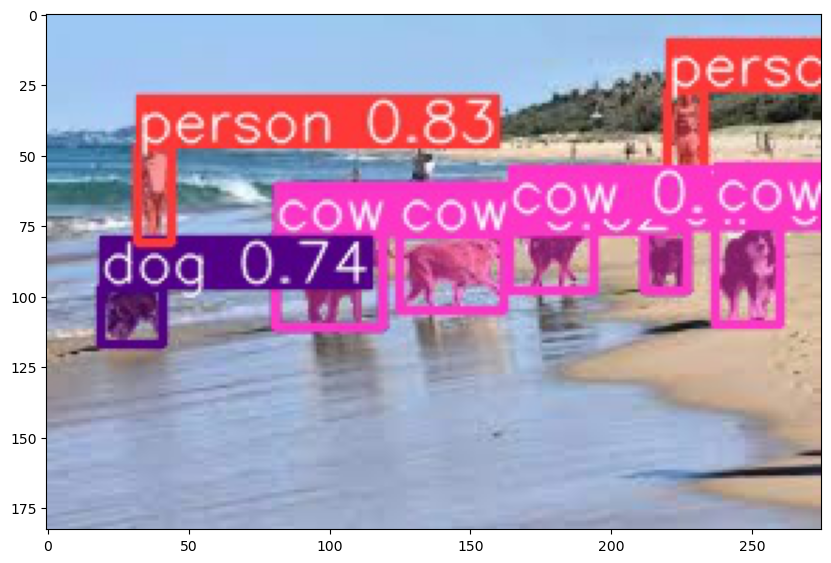

In [5]:
%cd {HOME}
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,8))
from PIL import Image
test_001 = Image.open(r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\runs\segment\predict\test_yoloV8.jpg")    # image from google.
plt.figure(figsize=(10,8))
plt.imshow(test_001)
plt.show()

#### 2. Python SDK
Simplest way of simply using YOLO V8 directly in a python enviroment.

In [6]:
from ultralytics import YOLO
model1 = YOLO(f'{HOME}/yolov8s-seg.pt')
results1 = model1.predict(source=r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\test_yoloV8.jpg", conf=0.25)


image 1/1 C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\test_yoloV8.jpg: 448x640 3 persons, 2 dogs, 1 horse, 4 cows, 96.5ms
Speed: 5.0ms preprocess, 96.5ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 640)


In [7]:
results1[0].boxes.xyxy

tensor([[236.7632,  71.0026, 260.4742, 110.6826],
        [ 32.0066,  47.2995,  44.5852,  79.0198],
        [164.3994,  72.2437, 194.4729,  99.2267],
        [212.3358,  75.9252, 227.0849,  97.9421],
        [ 19.1390,  97.2393,  40.9905, 117.8904],
        [127.1621,  78.4710, 164.3730, 104.5328],
        [220.5451,  27.6121, 234.2087,  47.3547],
        [ 80.3513,  78.2249, 119.3006, 111.6245],
        [223.3384,  40.5121, 232.6921,  60.7563],
        [131.8835,  50.6852, 138.3415,  64.1457]], device='cuda:0')

In [8]:
results1[0].boxes.conf

tensor([0.8191, 0.8153, 0.7769, 0.7415, 0.7062, 0.6688, 0.6398, 0.5879, 0.3261, 0.3000], device='cuda:0')

In [9]:
results1[0].boxes.cls

tensor([19.,  0., 19., 19., 16., 19.,  0., 16., 17.,  0.], device='cuda:0')

In [10]:
results1[0].masks[0]

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')
orig_shape: (183, 275)
shape: torch.Size([1, 448, 640])
xy: [array([[     247.07,      72.594],
       [     246.64,      73.023],
       [     246.21,      73.023],
       [     246.21,      73.453],
       [     245.78,      73.883],
       [     245.78,      76.891],
       [     245.35,       77.32],
       [     245.35,       77.75],
       [     243.63,      79.469],
       [      243.2,      79.469],
       [     242.34,      80.328],
       [     242.34,      80.758],
       [     241.05,      82.047],
       [     241.05,      82.477],
       [     240.62,      82.906],
       [     240.62,      85.055],
       [      240.2,      85.484],
 

#### Data Source from Kaggle (Medical Instance Segmentation with YOLOv8). 
HuBMAP - Hacking the Human Vasculature

In [12]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature


Ultralytics YOLOv8.0.229 🚀 Python-3.11.5 torch-2.1.2 CUDA:0 (Quadro RTX 4000, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\coco.yaml, epochs=40, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

train: Scanning C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\labels.cache... 1306 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1306/1306 [00:00<?, ?it/s]

train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\005715f0a313.tif: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\01a7fca6263b.tif: 7 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\025ec20b8b73.tif: 7 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\02cf5c2db152.tif: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\033a656390b2.tif: 4 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\0672b96aaccc.tif: 4 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kag


val: Scanning C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\labels.cache... 327 images, 0 backgrounds, 0 corrupt: 100%|██████████| 327/327 [00:00<?, ?it/s]

val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d0d0fda7789f.tif: 1 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d17335683f96.tif: 4 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d4a6a9e8d85e.tif: 8 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d6bd77533b2b.tif: 8 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d82695d80caf.tif: 1 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d873758275c6.tif: 12 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-

Plotting labels to runs\segment\train24\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
40 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/40      4.05G      1.976      3.047      2.864      1.433        127        640: 100%|██████████| 82/82 [00:23<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        327       3236      0.261      0.307      0.253       0.15      0.264      0.308      0.259      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/40      4.11G      1.751       2.36      1.958      1.268        128        640: 100%|██████████| 82/82 [00:21<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


                   all        327       3236       0.62      0.359      0.312      0.175      0.626      0.362      0.316      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/40      4.18G      1.731      2.317      1.801       1.25        140        640: 100%|██████████| 82/82 [00:22<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.60it/s]


                   all        327       3236      0.421      0.406      0.364      0.215      0.427      0.411      0.372      0.218

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.95G      1.713      2.253      1.748       1.24        146        640: 100%|██████████| 82/82 [00:23<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


                   all        327       3236      0.662      0.382      0.384      0.226      0.663      0.387      0.382      0.201

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/40      4.06G       1.69      2.219       1.65      1.224         94        640: 100%|██████████| 82/82 [00:23<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.69it/s]


                   all        327       3236      0.565      0.403      0.465      0.298      0.568      0.405      0.466       0.28

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/40      3.76G      1.668      2.186      1.594      1.216        129        640: 100%|██████████| 82/82 [00:23<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.70it/s]

                   all        327       3236      0.494      0.429      0.467       0.29      0.489      0.449      0.474      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/40       4.1G      1.627      2.145      1.544      1.195        133        640: 100%|██████████| 82/82 [00:24<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


                   all        327       3236      0.487      0.483      0.475      0.307       0.49      0.487       0.48      0.303

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/40      3.71G      1.643      2.139      1.534      1.198        100        640: 100%|██████████| 82/82 [00:22<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


                   all        327       3236      0.453      0.526      0.489      0.315      0.449      0.522      0.493      0.302

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.88G      1.613      2.085      1.479      1.186        132        640: 100%|██████████| 82/82 [00:22<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]


                   all        327       3236      0.517      0.522      0.505      0.325      0.516      0.525      0.511      0.325

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.68G       1.61      2.092      1.466      1.178        140        640: 100%|██████████| 82/82 [00:22<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


                   all        327       3236       0.79       0.43      0.496      0.333      0.789      0.435      0.501      0.327

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/40      4.04G      1.589      2.046      1.418      1.172        108        640: 100%|██████████| 82/82 [00:22<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]


                   all        327       3236      0.568      0.447      0.515      0.346      0.567      0.448      0.518      0.338

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/40      4.14G      1.586      2.066      1.423       1.17        174        640: 100%|██████████| 82/82 [00:22<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]


                   all        327       3236      0.512      0.516      0.516      0.346      0.504      0.513      0.515      0.329

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/40      3.91G      1.571      2.051      1.411      1.169        197        640: 100%|██████████| 82/82 [00:22<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


                   all        327       3236      0.478      0.522      0.508      0.321      0.483      0.523      0.513      0.325

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.88G       1.55      2.012      1.391      1.154        145        640: 100%|██████████| 82/82 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]


                   all        327       3236      0.538      0.564      0.543      0.361      0.532      0.558      0.541      0.355

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/40      4.24G      1.539      1.971      1.367      1.156        101        640: 100%|██████████| 82/82 [00:22<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


                   all        327       3236      0.575      0.551      0.542      0.359      0.584      0.546      0.545      0.364

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.81G      1.542      1.993      1.365       1.15        139        640: 100%|██████████| 82/82 [00:22<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]


                   all        327       3236      0.547      0.571      0.551      0.373      0.561      0.575      0.561      0.371

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/40      4.03G      1.536      2.004      1.347      1.155        104        640: 100%|██████████| 82/82 [00:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


                   all        327       3236      0.582      0.549      0.563      0.377      0.584      0.552      0.565      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/40      4.16G      1.531      1.992      1.344      1.145        132        640: 100%|██████████| 82/82 [00:23<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]


                   all        327       3236      0.564      0.557      0.561      0.378      0.568      0.562      0.565      0.374

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.84G       1.52      1.947      1.312       1.14        241        640: 100%|██████████| 82/82 [00:22<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


                   all        327       3236      0.581      0.539      0.556      0.375      0.583      0.545      0.562      0.378

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/40      4.04G      1.515      1.958      1.316      1.138        117        640: 100%|██████████| 82/82 [00:22<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]


                   all        327       3236      0.533      0.603      0.572       0.38      0.539       0.61      0.572      0.378

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.94G      1.495      1.952      1.298      1.137        126        640: 100%|██████████| 82/82 [00:21<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]


                   all        327       3236      0.543      0.563      0.556      0.375      0.554      0.575      0.566      0.378

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/40       3.9G      1.503      1.934      1.295      1.129        123        640: 100%|██████████| 82/82 [00:21<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]


                   all        327       3236      0.604      0.538      0.561      0.387      0.618       0.54      0.569      0.389

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.76G      1.478      1.923      1.275      1.127        122        640: 100%|██████████| 82/82 [00:21<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]


                   all        327       3236      0.574      0.563      0.568      0.389      0.592      0.565      0.579      0.387

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/40      4.01G      1.488       1.91      1.274      1.127        137        640: 100%|██████████| 82/82 [00:22<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.79it/s]


                   all        327       3236      0.556      0.576      0.591      0.405      0.558       0.58      0.597      0.403

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/40      3.93G      1.467       1.91      1.251      1.122        113        640: 100%|██████████| 82/82 [00:21<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]


                   all        327       3236      0.586      0.586      0.589      0.398       0.59      0.591      0.596      0.398

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.71G      1.463      1.882      1.235      1.112        183        640: 100%|██████████| 82/82 [00:22<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]


                   all        327       3236      0.585      0.586      0.585      0.401      0.582      0.595      0.591      0.403

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/40      4.47G      1.451      1.889      1.235      1.107        138        640: 100%|██████████| 82/82 [00:22<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.60it/s]


                   all        327       3236      0.605      0.578      0.582      0.403      0.614      0.582      0.588      0.401

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.73G      1.453      1.878       1.21      1.112        178        640: 100%|██████████| 82/82 [00:22<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


                   all        327       3236       0.61      0.568      0.584      0.403      0.602      0.581      0.594      0.405

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.97G      1.439      1.864      1.207      1.102        109        640: 100%|██████████| 82/82 [00:22<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]


                   all        327       3236      0.593      0.564      0.576      0.394      0.601      0.575      0.585      0.398

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.93G      1.443      1.852      1.194      1.102        126        640: 100%|██████████| 82/82 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]


                   all        327       3236      0.607      0.574      0.588      0.401      0.612      0.579      0.593      0.406
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.93G      1.455      1.864      1.234      1.128         92        640: 100%|██████████| 82/82 [00:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.79it/s]


                   all        327       3236      0.582      0.575      0.584      0.396      0.619       0.57      0.591      0.392

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.73G      1.431      1.845      1.189      1.114         66        640: 100%|██████████| 82/82 [00:21<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]


                   all        327       3236      0.553      0.604      0.581       0.39      0.561      0.605      0.586      0.391

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.54G      1.415      1.809      1.167       1.11         66        640: 100%|██████████| 82/82 [00:22<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.78it/s]


                   all        327       3236      0.587        0.6      0.586      0.403      0.591      0.599      0.596      0.399

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.76G      1.413      1.807      1.157      1.114         98        640: 100%|██████████| 82/82 [00:22<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.77it/s]


                   all        327       3236      0.551      0.606      0.587      0.401      0.562      0.613      0.594      0.399

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/40      3.74G      1.404      1.796      1.143      1.105         66        640: 100%|██████████| 82/82 [00:21<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]


                   all        327       3236      0.582      0.594      0.584      0.403        0.6      0.593      0.591      0.404

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.63G      1.405      1.789      1.138      1.104         77        640: 100%|██████████| 82/82 [00:21<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]


                   all        327       3236      0.597      0.595      0.593      0.415      0.614      0.596      0.604      0.414

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.57G      1.385      1.769      1.123      1.094         79        640: 100%|██████████| 82/82 [00:21<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]


                   all        327       3236      0.607      0.588      0.588      0.409      0.622      0.594      0.598      0.405

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.68G      1.371      1.763        1.1      1.087         52        640: 100%|██████████| 82/82 [00:21<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]


                   all        327       3236      0.604      0.601      0.592      0.413      0.614      0.609      0.598      0.404

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.53G      1.377      1.756      1.099      1.089         60        640: 100%|██████████| 82/82 [00:20<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]


                   all        327       3236      0.599      0.597      0.598      0.416      0.607      0.603      0.602      0.407

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.56G      1.369      1.754      1.092      1.082        123        640: 100%|██████████| 82/82 [00:20<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]


                   all        327       3236      0.622      0.574      0.597       0.42      0.635      0.585      0.603      0.413

40 epochs completed in 0.348 hours.
Optimizer stripped from runs\segment\train24\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train24\weights\best.pt, 6.8MB

Validating runs\segment\train24\weights\best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.11.5 torch-2.1.2 CUDA:0 (Quadro RTX 4000, 8192MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.19it/s]


                   all        327       3236      0.622      0.574      0.595      0.419      0.637      0.584      0.602      0.413
          blood_vessel        327       2955      0.658      0.654      0.691       0.38      0.673       0.67      0.708      0.353
            glomerulus        327        104      0.852      0.846      0.912      0.772      0.852      0.846      0.914      0.788
                unsure        327        177      0.357       0.22      0.182      0.107      0.384      0.237      0.185     0.0976
Speed: 0.3ms preprocess, 3.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\segment\train24

image 1/1 C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\72e40acccadf.tif: 640x640 11 blood_vessels, 13.0ms
Speed: 5.0ms preprocess, 13.0ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)


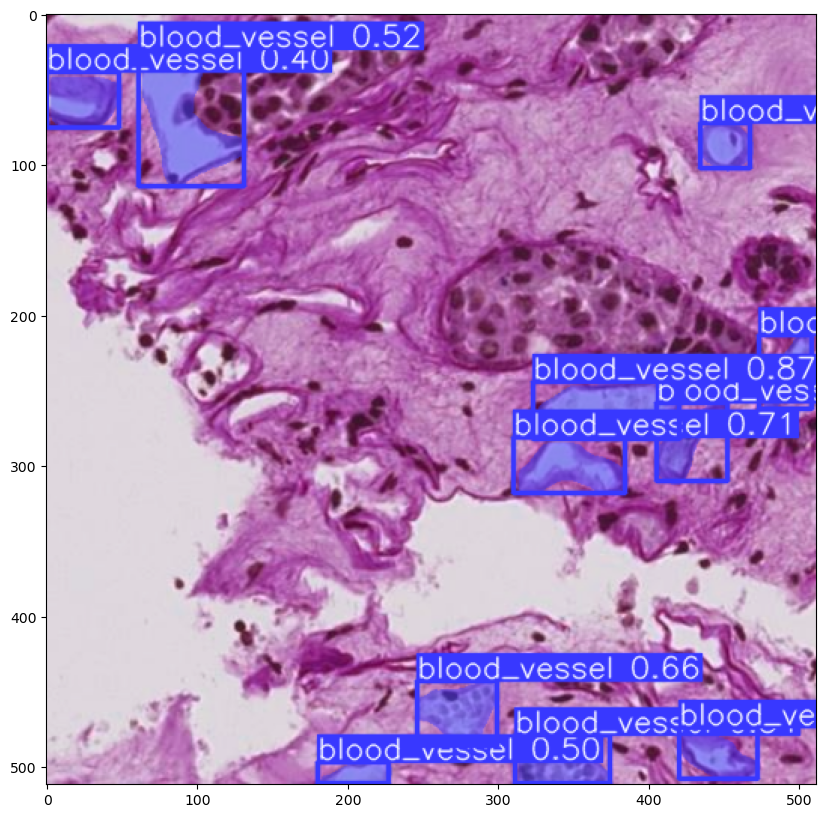

In [18]:
# Loaded human-vasculature data and YOLOv8n-seg model, trained for 40 epochs and predicted an test image with it.
from ultralytics import YOLO
import matplotlib.pyplot as plt
%matplotlib inline

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
results = model.train(data=r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\coco.yaml", epochs=40)  # train the model
history = model(r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\72e40acccadf.tif")[0]  # predict on an image[0]
plt.figure(figsize = (20,10))
image = history.plot()
plt.imshow(image)
plt.show()


image 1/1 C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d0e4047a291e.tif: 640x640 11 blood_vessels, 21.0ms
Speed: 5.0ms preprocess, 21.0ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 640)


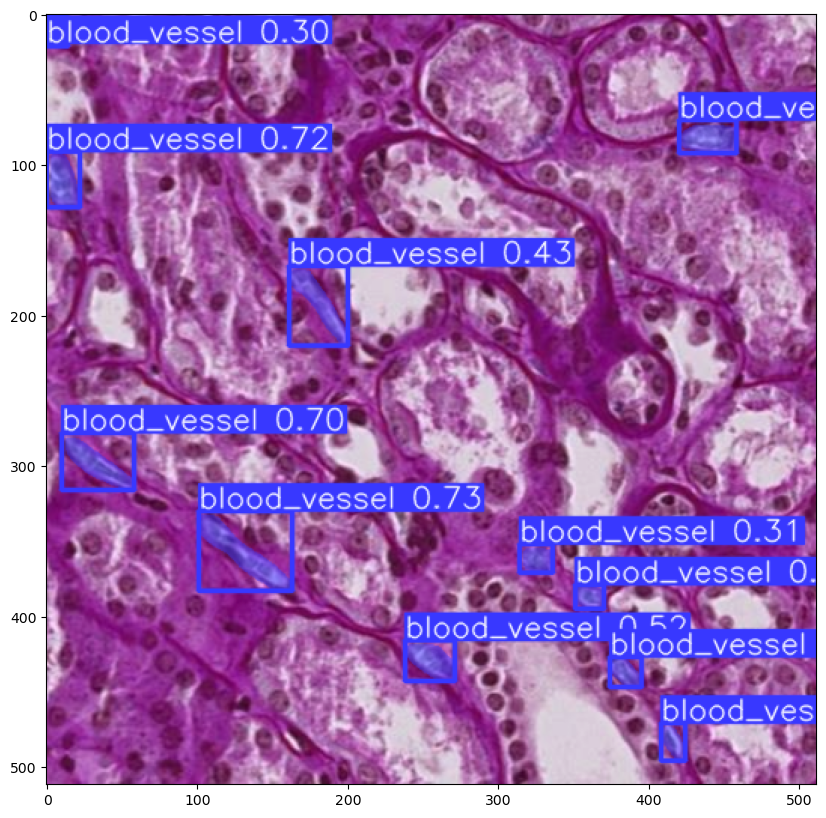

In [19]:
history = model(r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d0e4047a291e.tif")[0]  # predict on an image[0]
plt.figure(figsize = (20,10))
image = history.plot()
plt.imshow(image)
plt.show()

In [20]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
# logger = 'TensorBoard' #@param ['Comet', 'TensorBoard']

# if logger == 'Comet':
#   %pip install -q comet_ml
#   import comet_ml; comet_ml.init()
# elif logger == 'TensorBoard':
#   %load_ext tensorboard
#   %tensorboard --logdir .

#### Inference with Custom Model.

In [21]:
import os
import sys
import json
import shutil
from colorama import Fore
import yaml
import numpy as np
from colorama import Fore
from tqdm.notebook import tqdm
from itertools import chain
from typing import List
from ipywidgets import FloatProgress

In [27]:
class SetupPipline:
    def __init__(self, display: bool = True):
        self.pycocotools = self.__pycocotools()
        self.ultralytics = self.__ultralytics()
        
    @staticmethod
    def __ultralytics() -> str:
        sys.path.append("../hubmap-tools-ultralytics-and-pycocotools/ultralytics/ultralytics") 
        return "successfully"
        
    @staticmethod
    def __pycocotools() -> str:
        os.chdir(os.path.join(new_path, "pycocotools-2.0.6/"))
        os.system("python setup.py install")
        os.system("pip install . --no-index --find-links new_path")
        os.chdir(r"C:\Users\Sealion\Desktop\kaggle\working")
        return "successfully"
    
    def display(self) -> None:
        print(Fore.GREEN+f"\nPycocotools was installed {self.pycocotools}")
        print(f"Ultralytics was installed {self.ultralytics}"+Fore.WHITE)

In [28]:
new_path = r"C:\Users\Sealion\Desktop\kaggle\working\packages"
os.path.exists(new_path)

True

In [29]:
pipline = SetupPipline()
pipline.display()


Pycocotools was installed successfully
Ultralytics was installed successfully


In [30]:
# !pip install pycocotools
# !pip install ultralytics
import pycocotools
import ultralytics
from pycocotools import _mask as coco_mask 
from ultralytics import YOLO

In [31]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.229 🚀 Python-3.11.5 torch-2.1.2 CUDA:0 (Quadro RTX 4000, 8192MiB)
Setup complete ✅ (32 CPUs, 127.7 GB RAM, 610.4/1860.7 GB disk)


In [ ]:
# pip install clearml
# run clearml-init

In [32]:
# Training and optimization parameters
def main():
    model = YOLO("yolov8x-seg.pt")
    model.train(
        deterministic=True,
        seed=111,
        project="HuBMAP",
        name="yolov8x-seg",
        data=r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\coco.yaml", 
        save=True,
        save_period=5,
        pretrained=True,
        imgsz=512,
        epochs=100,
        batch=4,
        workers=8,
        val=True,
        device=0,
        lr0=0.18,
        patience=3,
        optimizer="SGD",
        momentum=0.95,
        weight_decay=0.0005,
        close_mosaic=3,
    )

In [34]:
if __name__ == '__main__':
    main()

Ultralytics YOLOv8.0.229 🚀 Python-3.11.5 torch-2.1.2 CUDA:0 (Quadro RTX 4000, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\coco.yaml, epochs=100, time=None, patience=3, batch=4, imgsz=512, save=True, save_period=5, cache=False, device=0, workers=8, project=HuBMAP, name=yolov8x-seg5, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=111, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=3, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

train: Scanning C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\labels... 1306 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1306/1306 [00:04<00:00, 326.24it/s]

train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\005715f0a313.tif: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\01a7fca6263b.tif: 7 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\025ec20b8b73.tif: 7 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\02cf5c2db152.tif: 1 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\033a656390b2.tif: 4 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\images\0672b96aaccc.tif: 4 duplicate labels removed
train: WARNING ⚠️ C:\Users\Sealion\Desktop\kag

train: New cache created: C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\train\labels.cache


val: Scanning C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\labels... 327 images, 0 backgrounds, 0 corrupt: 100%|██████████| 327/327 [00:00<00:00, 329.58it/s]

val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d0d0fda7789f.tif: 1 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d17335683f96.tif: 4 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d4a6a9e8d85e.tif: 8 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d6bd77533b2b.tif: 8 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d82695d80caf.tif: 1 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d873758275c6.tif: 12 duplicate labels removed
val: WARNING ⚠️ C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-

val: New cache created: C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\labels.cache
Plotting labels to HuBMAP\yolov8x-seg5\labels.jpg... 
optimizer: SGD(lr=0.18, momentum=0.947) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.79G      2.167      3.118      2.731      1.582         36        512: 100%|██████████| 327/327 [01:37<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  2.95it/s]

                   all        327       3236     0.0151      0.155     0.0138    0.00662     0.0131      0.106    0.00733    0.00181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100       3.8G      2.797      3.823      5.414      1.904         27        512: 100%|██████████| 327/327 [01:40<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.38it/s]

                   all        327       3236      0.342     0.0481    0.00493    0.00158      0.341     0.0385    0.00302   0.000832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.86G      3.382      4.316      4.342      2.384         43        512: 100%|██████████| 327/327 [01:41<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.51it/s]

                   all        327       3236    0.00222    0.00745    0.00123   0.000446      0.004    0.00512    0.00137   0.000349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.81G      3.197      5.233      4.941      2.448         44        512: 100%|██████████| 327/327 [01:40<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.45it/s]

                   all        327       3236     0.0057      0.162     0.0178    0.00575    0.00463      0.132     0.0155    0.00381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.83G      2.935      7.642      4.017      2.167         16        512: 100%|██████████| 327/327 [01:40<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:11<00:00,  3.44it/s]

                   all        327       3236     0.0149       0.18     0.0341     0.0113      0.013      0.155     0.0265    0.00665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100       3.8G      2.786      10.35      3.332      2.024         17        512: 100%|██████████| 327/327 [01:40<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]

                   all        327       3236      0.063      0.082     0.0367     0.0131          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.93G      2.683      5.639      3.351       1.97         32        512: 100%|██████████| 327/327 [01:40<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.24it/s]

                   all        327       3236     0.0447      0.138     0.0585     0.0221      0.042      0.129     0.0489     0.0123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.88G      2.743      4.853      3.395      2.019         22        512: 100%|██████████| 327/327 [01:40<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.12it/s]

                   all        327       3236     0.0308      0.129     0.0296    0.00874     0.0338      0.137     0.0336     0.0094



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.95G      2.626      4.627      3.481      1.916         21        512: 100%|██████████| 327/327 [01:45<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:14<00:00,  2.92it/s]

                   all        327       3236     0.0136       0.53     0.0684     0.0254     0.0132       0.48     0.0698     0.0231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.87G       2.56      3.825      3.218      1.876         13        512: 100%|██████████| 327/327 [01:43<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.16it/s]

                   all        327       3236       0.41      0.148     0.0614     0.0211      0.413      0.154     0.0659     0.0204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.85G      2.517      3.503      3.073      1.848         61        512: 100%|██████████| 327/327 [01:42<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.13it/s]

                   all        327       3236      0.713      0.127     0.0392     0.0156     0.0101      0.076    0.00567   0.000901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.79G      2.404      3.563      2.917      1.809         32        512: 100%|██████████| 327/327 [01:42<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.07it/s]

                   all        327       3236      0.715      0.207     0.0845     0.0309      0.716      0.212     0.0906     0.0295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100       3.8G      2.356      3.314      2.577      1.753         27        512: 100%|██████████| 327/327 [01:42<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.22it/s]

                   all        327       3236      0.377      0.313      0.116     0.0435      0.373      0.289      0.114     0.0381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.76G      2.321      3.084      2.618      1.745          6        512: 100%|██████████| 327/327 [01:41<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.20it/s]

                   all        327       3236      0.475      0.161     0.0967     0.0429      0.484      0.163     0.0987     0.0397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.81G      2.301       3.03      2.359       1.71         22        512: 100%|██████████| 327/327 [01:42<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]

                   all        327       3236      0.501       0.19      0.104     0.0368      0.498      0.177      0.101     0.0327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.88G       2.21      2.965      2.347      1.688         19        512: 100%|██████████| 327/327 [01:41<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.28it/s]

                   all        327       3236      0.447      0.231      0.145     0.0549      0.446      0.226      0.144     0.0491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.81G       2.21       2.93      2.229      1.672         18        512: 100%|██████████| 327/327 [01:42<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.24it/s]

                   all        327       3236      0.397      0.329      0.138     0.0557      0.404      0.285      0.136     0.0502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.79G      2.197      2.861      2.134      1.665         29        512: 100%|██████████| 327/327 [01:42<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.25it/s]

                   all        327       3236      0.472      0.176      0.161     0.0662      0.477      0.183      0.174     0.0675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.81G      2.138       2.76      2.131      1.626         26        512: 100%|██████████| 327/327 [01:43<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.08it/s]

                   all        327       3236      0.485      0.232      0.173     0.0712       0.49      0.242      0.174     0.0633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100       3.9G      2.081      2.719      2.101      1.588         21        512: 100%|██████████| 327/327 [01:42<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.22it/s]

                   all        327       3236      0.448      0.261      0.101     0.0422      0.452      0.267      0.104     0.0403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.83G      2.059      2.719      2.069      1.586         40        512: 100%|██████████| 327/327 [01:44<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.27it/s]

                   all        327       3236      0.532      0.224       0.19     0.0779      0.538      0.224      0.192     0.0698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.82G       2.05      2.661       2.04      1.583         18        512: 100%|██████████| 327/327 [01:43<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.22it/s]

                   all        327       3236      0.811      0.175      0.186     0.0732      0.811      0.172      0.189     0.0669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.83G      2.023      2.625      1.991      1.568         23        512: 100%|██████████| 327/327 [01:43<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.17it/s]

                   all        327       3236      0.255      0.271      0.142       0.06       0.25      0.255       0.15     0.0589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.87G      2.009      2.684      1.925      1.543         17        512: 100%|██████████| 327/327 [01:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.13it/s]

                   all        327       3236       0.24       0.24      0.213     0.0912      0.277      0.247      0.235     0.0849



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.8G      1.976      2.647      1.837      1.529         11        512: 100%|██████████| 327/327 [01:43<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.21it/s]

                   all        327       3236      0.271      0.359      0.228     0.0911      0.277      0.357      0.235     0.0836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.83G      1.967      2.547      1.853      1.523         38        512: 100%|██████████| 327/327 [01:43<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.22it/s]

                   all        327       3236      0.256      0.271      0.201     0.0834      0.254      0.253      0.193     0.0687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.94G      1.977      2.562      1.808      1.522         57        512: 100%|██████████| 327/327 [01:42<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.28it/s]

                   all        327       3236      0.563      0.279      0.232     0.0947      0.568      0.287      0.236     0.0857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100       3.8G      1.933      2.563      1.797      1.499         23        512: 100%|██████████| 327/327 [01:41<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.32it/s]

                   all        327       3236      0.599      0.289      0.272       0.12      0.616      0.309      0.282       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.88G      1.924      2.521      1.786      1.489         33        512: 100%|██████████| 327/327 [01:40<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:12<00:00,  3.26it/s]

                   all        327       3236      0.312      0.332       0.26      0.112      0.333      0.322      0.266      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.84G      1.909      2.428      1.757      1.492         27        512: 100%|██████████| 327/327 [01:43<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.06it/s]

                   all        327       3236      0.569      0.298       0.25      0.111      0.588      0.308      0.269      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.76G      1.904      2.394       1.74      1.483         39        512: 100%|██████████| 327/327 [01:42<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.15it/s]

                   all        327       3236      0.597      0.289      0.282      0.121      0.588      0.308      0.282      0.104
Stopping training early as no improvement observed in last 3 epochs. Best results observed at epoch 28, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



31 epochs completed in 1.020 hours.
Optimizer stripped from HuBMAP\yolov8x-seg5\weights\last.pt, 143.9MB
Optimizer stripped from HuBMAP\yolov8x-seg5\weights\best.pt, 143.9MB

Validating HuBMAP\yolov8x-seg5\weights\best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.11.5 torch-2.1.2 CUDA:0 (Quadro RTX 4000, 8192MiB)
YOLOv8x-seg summary (fused): 295 layers, 71723545 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:13<00:00,  3.07it/s]


                   all        327       3236      0.598      0.288      0.272       0.12      0.616      0.308      0.283       0.12
          blood_vessel        327       2955      0.526      0.546      0.513      0.234      0.529      0.549      0.517      0.212
            glomerulus        327        104       0.27      0.317      0.236     0.0873      0.319      0.375      0.262      0.111
                unsure        327        177          1          0     0.0672      0.038          1          0     0.0691     0.0372
Speed: 0.3ms preprocess, 21.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to HuBMAP\yolov8x-seg5


In [ ]:
# new_path = r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\ed6a92a9410c.tif"
# os.path.exists(new_path)


image 1/1 C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\72e40acccadf.tif: 512x512 3 blood_vessels, 2 glomeruluss, 70.0ms
Speed: 2.0ms preprocess, 70.0ms inference, 6.0ms postprocess per image at shape (1, 3, 512, 512)


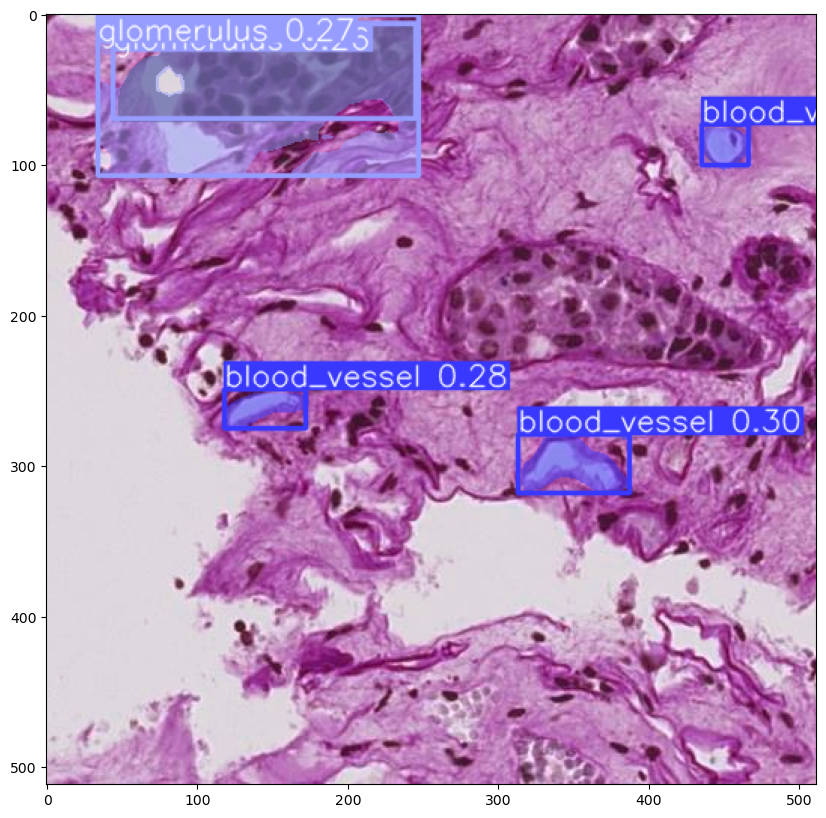

In [35]:
# Trained and predicted for test image.
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,10))
model = YOLO(r"C:\Users\Sealion\Desktop\kaggle\working\HuBMAP\yolov8x-seg\weights\best.pt")
history = model.predict(r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\72e40acccadf.tif")[0]
image = history.plot()
plt.imshow(image)
plt.show()


image 1/1 C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d0e4047a291e.tif: 512x512 9 blood_vessels, 2 glomeruluss, 72.5ms
Speed: 2.0ms preprocess, 72.5ms inference, 7.0ms postprocess per image at shape (1, 3, 512, 512)


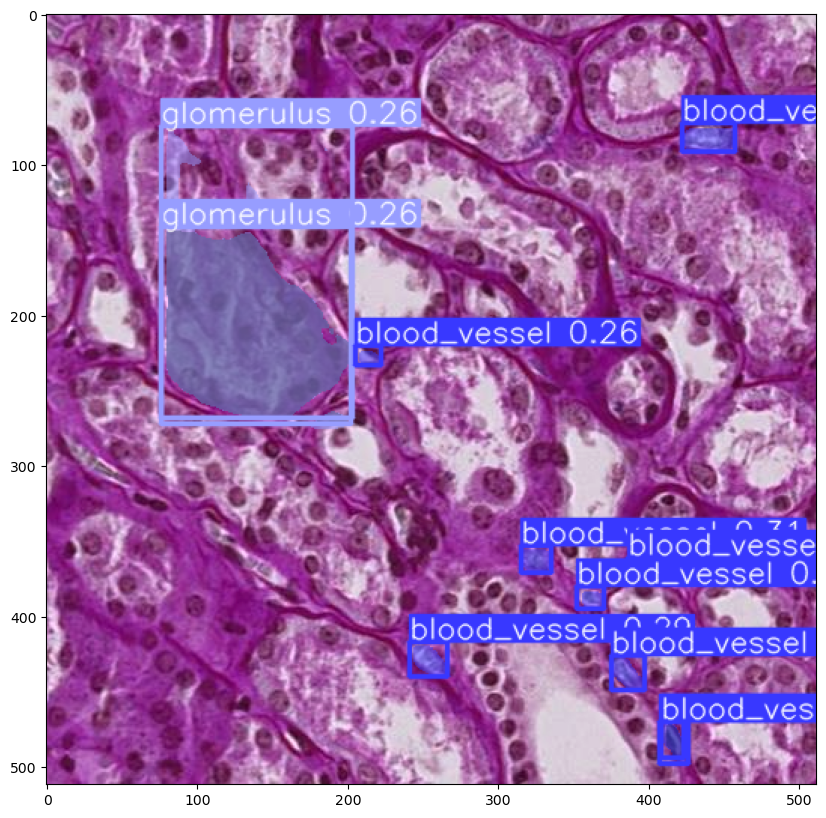

In [36]:
# Trained and predicted.
history = model(r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\dataset\val\images\d0e4047a291e.tif")[0]  # predict on an image[0]
plt.figure(figsize = (20,10))
image = history.plot()
plt.imshow(image)
plt.show()

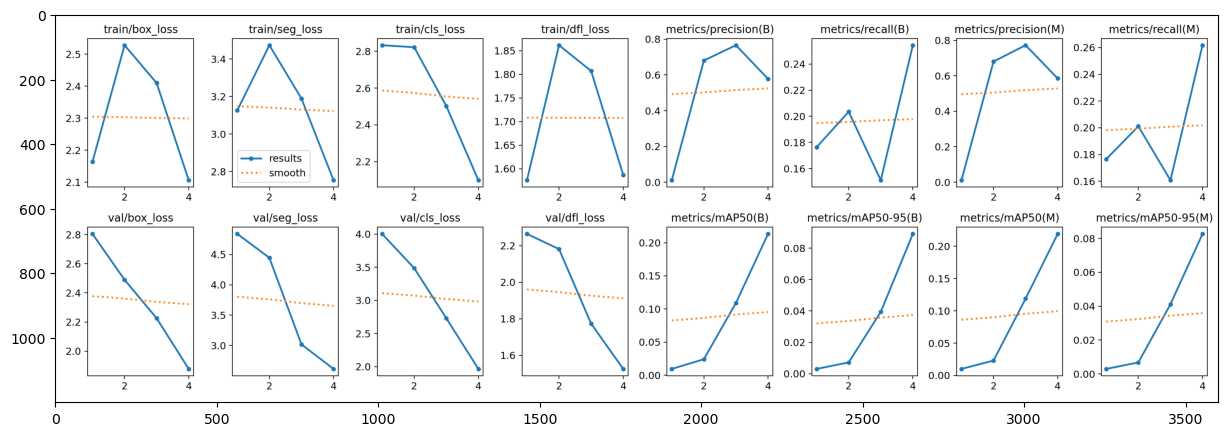

In [37]:
from PIL import Image
F1_curve = Image.open(r"C:\Users\Sealion\Desktop\kaggle\working\HuBMAP\yolov8x-seg\results.png")
plt.figure(figsize=(15,20))
plt.imshow(F1_curve)
plt.show()

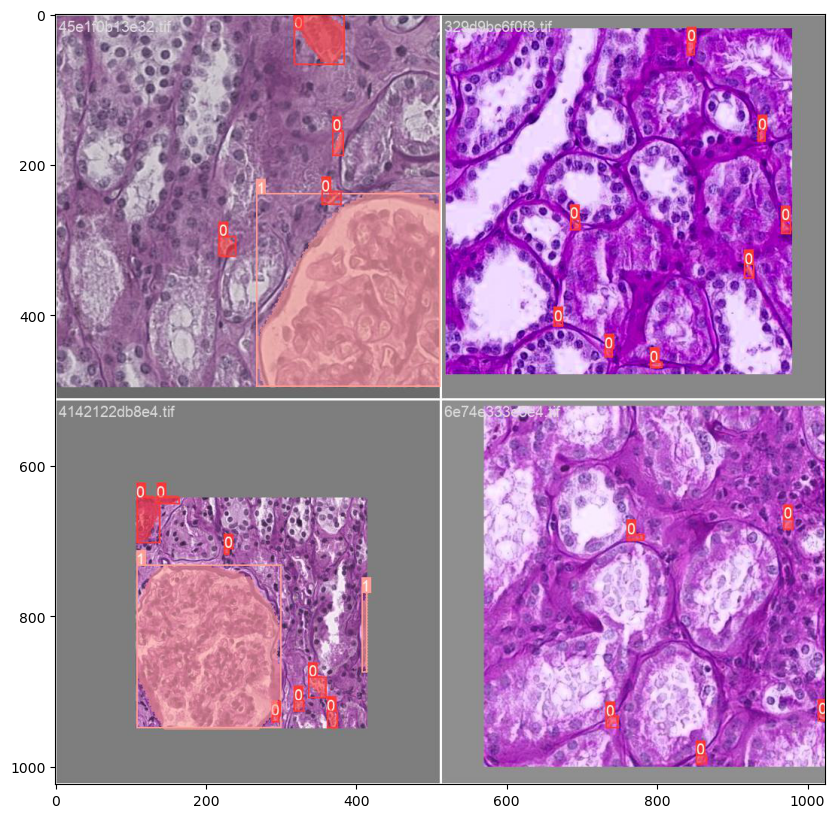

In [38]:
P_curve = Image.open(r"C:\Users\Sealion\Desktop\kaggle\working\HuBMAP\yolov8x-seg\train_batch328.jpg")
plt.figure(figsize = (20,10))
plt.imshow(P_curve)
plt.show()

#### Summary
1. This project we performed annotation with YOLOv8 instant=ce segmentation.
2. Compared different methdos for annotation (instance segmentation).
2. Need further custom training for accurate prediction.
3. Need more optimization and Logging/tracking tools (like WendB, MLflow, Clear ML, Roboflow, Tensorboard and MLflow)
4. CI/CD pipelines for model deployment.

#### Ackknowledge
1. kaggle (like dataset and some ideals). 
2. References related ultralytics.
3. YOLOv8 Tutorial.